# Week 13 - 22/1/18

**OBJECTIVES**

- Change scaling to class $\checkmark$
- Use exponent scaling $\checkmark$
- Explore different scales $\checkmark$
- Look at eps_distance_hier function for bug in DM selection

In [1]:
%load_ext autoreload
%autoreload 2

## Test new class structure with $\gamma$ scaling form

In [97]:
import matplotlib.pyplot as plt
from hm.analysis.scaling.plots import eps_distance
import hm.analysis.scaling.eps_scale
import pandas as pd

from hm.analysis.scaling.pop_hierarchy import pop_hier

### London

In [3]:
df = pd.read_csv("../../data/LSOA populations and areas 2011 (merged).csv")
lon_df = df[df['Easting'] < 561966][df['Easting'] > 493024][df['Northing'] < 207218][df['Northing'] > 150912]

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [4]:
d_maxs = [300, 500, 700, 1000, 1300]
df = lon_df
N = 20 # number of bins

In [7]:
h = pop_hier(df, d_maxs)

In [ ]:
eps = h.epsilon(2)

In [11]:
DM = h.cluster_population(h.levels[1]).DM

In [14]:
eps

array([[  0.00000000e+00,   1.93752582e-01,   1.48190583e-01, ...,
         -1.23462084e-03,  -5.98583926e-03,  -3.61191993e-03],
       [  1.90446145e-01,   0.00000000e+00,   1.17470412e-01, ...,
         -5.36163873e-03,  -1.02289879e-02,  -7.88973052e-03],
       [  1.30111901e-01,   1.02485005e-01,   0.00000000e+00, ...,
          2.74900709e-04,  -5.40555211e-03,  -2.48659133e-03],
       ..., 
       [ -1.05749544e-01,  -1.05765878e-01,  -8.08191965e-02, ...,
          0.00000000e+00,   2.14393417e-01,   2.93022992e-01],
       [ -1.18103628e-01,  -1.18230428e-01,  -9.38920137e-02, ...,
          2.08228575e-01,   0.00000000e+00,   2.70896582e-01],
       [ -1.26915403e-01,  -1.27089915e-01,  -1.01923140e-01, ...,
          2.79633877e-01,   2.64562154e-01,   0.00000000e+00]])

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


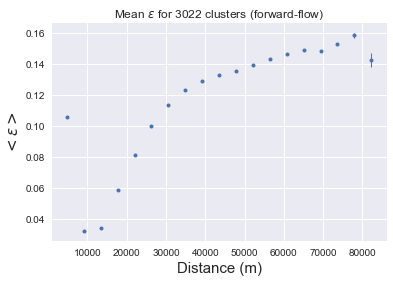

In [12]:
eps_distance(abs(eps), DM, N)

This looks quite different, probably because the exponent has changed quite dramatically? $\gamma$ is much smaller now so the effect of the further clusters is greater. Need to test it with the same exponent to make sure.

In [8]:
h2 = pop_hier(df, d_maxs) # I modified the class to just set gamma = 3.49 (as it was before)

In [9]:
eps = h2.epsilon(2)

/Users/JBremner/Documents/Docs/Imperial/Msci Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/JBremner/Documents/Docs/Imperial/Msci Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


In [15]:
DM = h2.cluster_population(h2.levels[1]).DM

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


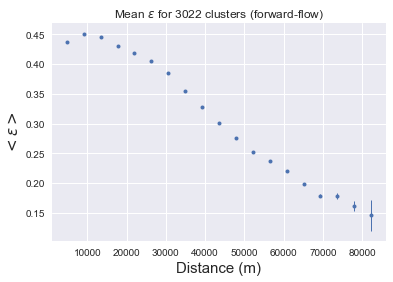

In [16]:
eps_distance(abs(eps), DM, N)

Ok so this is good, it tells us that the class form gives the same results. Now will change the gamma form back to what it was.

### Manchester & Liverpool

Recalculating the epsilon from the previous week

In [ ]:
man_liv_df = df[(df['Easting'] < 411155) & (df['Easting'] > 315165)][(df['Northing'] < 427723) & (df['Northing'] > 359983)]

In [25]:
d_maxs = [300, 500, 700, 1000, 1300]
level = 3
gamma = 3.49
df2 = man_liv_df
N = 20 # number of bins

In [27]:
h3 = pop_hier(df2, d_maxs)

In [ ]:
eps = h3.epsilon(3)

In [29]:
DM = h3.cluster_population(h3.levels[1]).DM

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


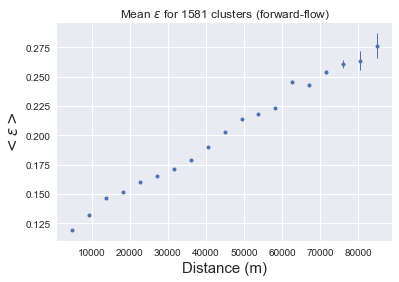

In [32]:
eps_distance(abs(eps), DM, N)

Don't really know what this means... looks roughly linear.

# Multi-layer scaling

I've made a method to plot the scaling of $\epsilon$ at different clustering levels.

In [119]:
from hm.analysis.scaling.plots import *

## London

In [ ]:
df = pd.read_csv("../../data/LSOA populations and areas 2011 (merged).csv")
lon_df = df[df['Easting'] < 561966][df['Easting'] > 493024][df['Northing'] < 207218][df['Northing'] > 150912]

In [116]:
d_maxs = [300, 500, 700, 1000, 1300]
df = lon_df
N = 20 # number of bins

In [117]:
h = pop_hier(df, d_maxs)

In [ ]:
epsList, DMList = eps_hier(h)

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


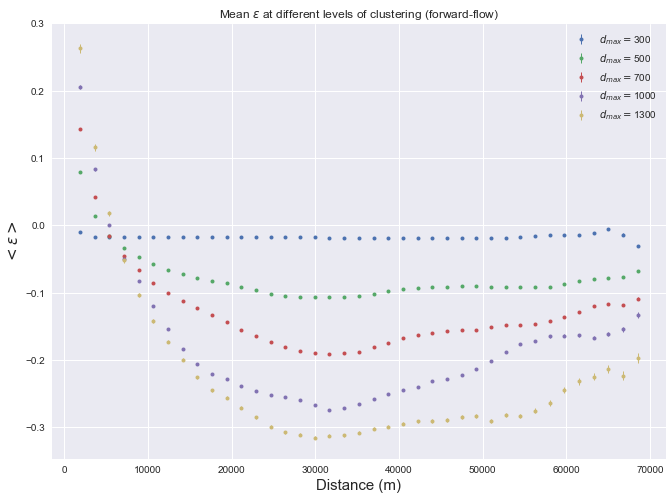

In [121]:
eps_distance_hier(epsList, DMList, d_maxs, 40)
plt.show()

## Manchester & Liverpool

In [ ]:
man_liv_df = df[(df['Easting'] < 411155) & (df['Easting'] > 315165)][(df['Northing'] < 427723) & (df['Northing'] > 359983)]

In [42]:
d_maxs = [300, 500, 700, 1000, 1300]
df = man_liv_df
N = 20 # number of bins

In [43]:
h2 = pop_hier(df, d_maxs)

In [ ]:
epsList, DMList = eps_hier(h2)

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


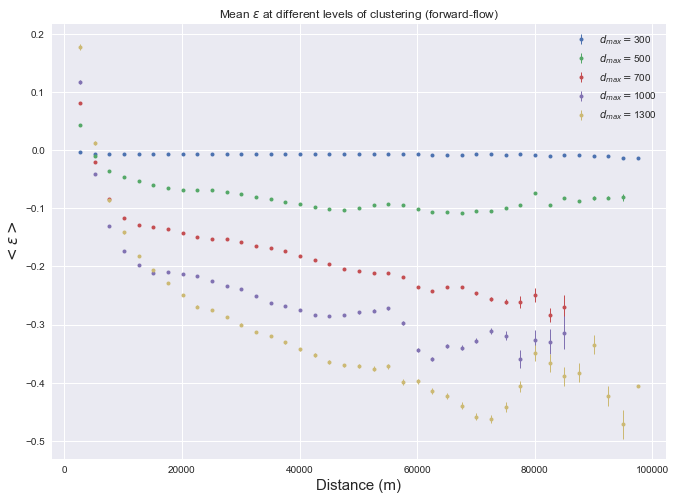

In [45]:
eps_distance_hier(epsList, DMList, d_maxs, 40)
plt.show()

## Birmingham

In [ ]:
bir_df = df[(df['Easting'] < 447384) & (df['Easting'] > 375647)][(df['Northing'] < 314728) & (df['Northing'] > 261315)]

In [5]:
d_maxs = [300, 500, 700, 1000, 1300]
df = bir_df
N = 20 # number of bins

In [6]:
h2 = pop_hier(df, d_maxs)

In [ ]:
epsList, DMList = eps_hier(h2)

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


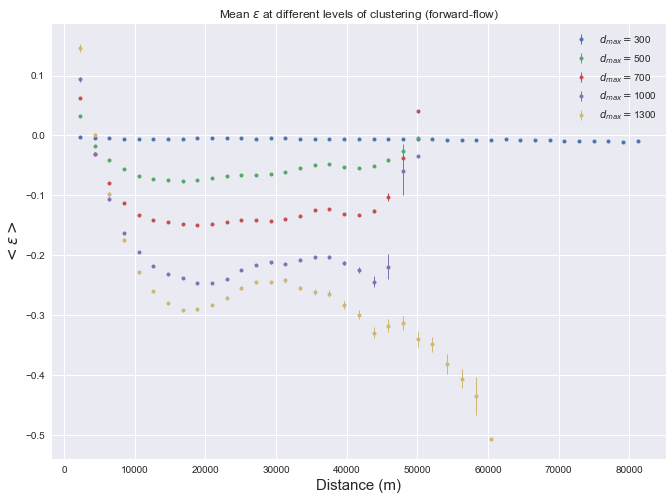

In [12]:
eps_distance_hier(epsList, DMList, d_maxs, 40)
plt.show()

## Check the uniform masses

In [78]:
from hm.analysis.scaling.pop_tools import make_pop
import numpy as np
import seaborn as sns; sns.set()

In [62]:
sub_df = lon_df

In [63]:
meanSize = int(sub_df['TotPop2011'].mean())
meanSize

1678

In [64]:
og_df = sub_df.copy() # the orginal population size distribution dataframe
unif_df = sub_df.copy() # the uniform population size dataframe

In [65]:
unif_df['TotPop2011'] = meanSize*np.ones(len(unif_df['TotPop2011'])) # with uniform size equal to the mean size

In [66]:
og_df['TotPop2011'].head()

15785    1485
15786    1723
15787    1993
15789    1882
15791    1510
Name: TotPop2011, dtype: int64

In [67]:
unif_df['TotPop2011'].head()

15785    1678.0
15786    1678.0
15787    1678.0
15789    1678.0
15791    1678.0
Name: TotPop2011, dtype: float64

Good, now all the populations in unif_df are uniform. Now let's compare the effects this has on flow and the epsilon matrix.

In [111]:
d_maxs = [300, 500, 700, 1000, 1300, 3000, 5000]
N = 20 # number of bins

In [112]:
og_h = pop_hier(og_df, d_maxs)
unif_h = pop_hier(unif_df, d_maxs)

In [ ]:
og_eps = og_h.epsilon(4)
unif_eps = unif_h.epsilon(4)

In [126]:
og_DM = og_h.DM_level(4)
unif_DM = unif_h.DM_level(4)

In [ ]:
og_ODM = og_h.gravity_ODM(7)
unif_ODM = unif_h.gravity_ODM(7)

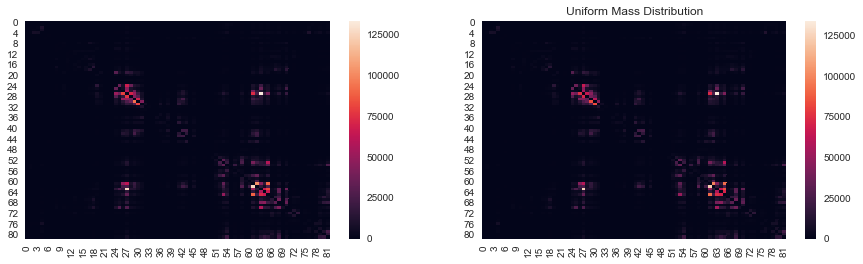

In [91]:
fig,axn = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_figwidth(15)
plt.title('Original Mass Distribution')
sns.heatmap(og_ODM, ax=axn.flat[0])
plt.title('Uniform Mass Distribution')
sns.heatmap(unif_ODM, ax=axn.flat[1])

plt.show()

In [94]:
og_eps

array([[ 0.        ,  0.4307451 ,  0.35073154, ..., -0.02637808,
        -0.01506598, -0.01768618],
       [ 0.42486742,  0.        ,  0.28762483, ..., -0.03572625,
        -0.02443149, -0.02850457],
       [ 0.33604677,  0.27950355,  0.        , ...,  0.0070431 ,
         0.0202828 ,  0.01835066],
       ..., 
       [-0.33448019, -0.33285342, -0.26583101, ...,  0.        ,
         0.44678273,  0.35555592],
       [-0.35358627, -0.35212796, -0.28099081, ...,  0.43336492,
         0.        ,  0.4436277 ],
       [-0.32313223, -0.32352654, -0.25140582, ...,  0.35579642,
         0.45742134,  0.        ]])

In [95]:
unif_eps

array([[ 0.        ,  0.42800329,  0.34681185, ..., -0.03164   ,
        -0.01953963, -0.02225345],
       [ 0.42248153,  0.        ,  0.28336771, ..., -0.04030996,
        -0.02820629, -0.03241993],
       [ 0.33474316,  0.27754561,  0.        , ...,  0.00584008,
         0.01992663,  0.01798116],
       ..., 
       [-0.33183876, -0.33016304, -0.26312395, ...,  0.        ,
         0.43222613,  0.35746934],
       [-0.35076226, -0.34923361, -0.27792885, ...,  0.41749893,
         0.        ,  0.43279704],
       [-0.30789447, -0.30826508, -0.23653049, ...,  0.36325436,
         0.45235995,  0.        ]])

Ok so the $\epsilon$ matrices are slightly different, but not by that much it seems. We need to quantify by exactly how much.

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


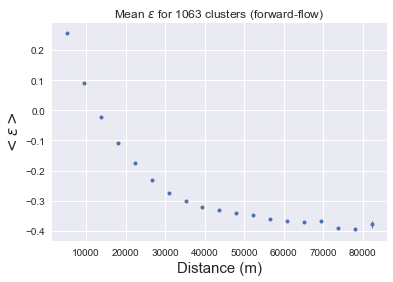

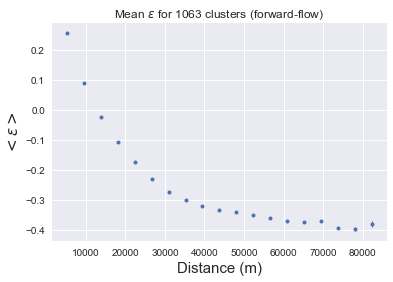

In [127]:
eps_distance(og_eps, og_DM, N)
eps_distance(unif_eps, unif_DM, N)

These look the same as Ilaria's now, great. We've written a method to return the distance matrix at different levels.